Conjunctions in space occur when two or more Resident Space Objects(RSOs) in the Earth's orbit pass dangerously close to one another, resulting inpossible collision scenarios. With the rapid increase in the number of RSOs in recenttimes, the number of predicted conjunctions has significantly increased. The interpretation and visualisation of around 250,000 conjunctions per day is achallenging data analytics problem.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime 
import datetime as dt

Assumption: Column TCA(Time of closes approach) is in object form so will convert it into DateTime Format Iam Assuming Date to be from 1st of november 2023 Looking at the column TCA is in time format "Hour:Minute.Second" and i will take a time difference of 24 hours to be one day and continuing the date for every 24 hour difference

In [41]:
#Import the Dataset
data=pd.read_csv("celestrak.csv")
data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,14:31.6,0.034,10.061,0.03,0.010
1,44761,STARLINK-1056 [+],4.723,89161,UNKNOWN [-],4.481,57:43.5,0.035,13.613,0.02,0.015
2,43797,SKYSAT-C12 [+],5.807,56190,NUSAT-36 (ANNIE CANNON) [+],5.547,46:31.7,0.037,14.918,0.00,0.023
3,50995,MDASAT-1A [+],4.374,54782,STARLINK-5437 [P],3.999,01:47.3,0.038,14.470,0.01,0.020
4,51132,STARLINK-3393 [+],2.281,42570,DELTA 1 DEB [-],2.788,24:25.2,0.038,14.672,0.01,0.022
...,...,...,...,...,...,...,...,...,...,...,...
67699,49423,STARLINK-3149 [+],6.172,270052,UNKNOWN [-],6.467,54:49.7,5.000,13.982,0.00,2.372
67700,50500,ONEWEB-0429 [+],7.226,45334,SL-14 DEB [-],7.490,05:12.2,5.000,10.162,0.00,1.569
67701,53139,STARLINK-4185 [+],0.819,57583,OBJECT D [+],0.621,34:16.4,5.000,7.308,0.00,1.322
67702,54184,STARLINK-5162 [+],6.729,57024,OBJECT W [+],6.684,37:32.7,5.000,14.555,0.00,2.764


In [42]:
#Check for Dimensions of a Data
data.shape

(67704, 11)

In [43]:
# Check for any missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67704 non-null  int64  
 1   OBJECT_NAME_1       67704 non-null  object 
 2   DSE_1               67704 non-null  float64
 3   NORAD_CAT_ID_2      67704 non-null  int64  
 4   OBJECT_NAME_2       67704 non-null  object 
 5   DSE_2               67704 non-null  float64
 6   TCA                 67704 non-null  object 
 7   TCA_RANGE           67704 non-null  float64
 8   TCA_RELATIVE_SPEED  67704 non-null  float64
 9   MAX_PROB            67704 non-null  float64
 10  DILUTION            67704 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


There is no missing or Null values in the Dataset so continuing with Data Analysis

Column TCA(Time of closes approach) is in object form so will convert it into DateTime Format
Iam Assuming Date to be from 1st of november 2023 
Looking at the column TCA is in time format "Hour:Minute.Second" and i will take a time difference of 24 hours to be one day and continuing the date for every 24 hour difference

In [44]:
# Setting a start date 
start_date = datetime.datetime(2023, 11, 1)
start_date

datetime.datetime(2023, 11, 1, 0, 0)

In [45]:
# Converting the time format to decimal using lambda function
data['TCA'] = data['TCA'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60)
data['TCA']

0        14.526667
1        57.725000
2        46.528333
3         1.788333
4        24.420000
           ...    
67699    54.828333
67700     5.203333
67701    34.273333
67702    37.545000
67703     3.850000
Name: TCA, Length: 67704, dtype: float64

In [46]:
#Combining date and time using lamda function
data['TCA'] = data['TCA'].apply(lambda x: start_date + datetime.timedelta(hours=x))
data['TCA']

0       2023-11-01 14:31:36
1       2023-11-03 09:43:30
2       2023-11-02 22:31:42
3       2023-11-01 01:47:18
4       2023-11-02 00:25:12
                ...        
67699   2023-11-03 06:49:42
67700   2023-11-01 05:12:12
67701   2023-11-02 10:16:24
67702   2023-11-02 13:32:42
67703   2023-11-01 03:51:00
Name: TCA, Length: 67704, dtype: datetime64[ns]

In [47]:
# Checking for the modified Table
data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,2023-11-01 14:31:36,0.034,10.061,0.03,0.010
1,44761,STARLINK-1056 [+],4.723,89161,UNKNOWN [-],4.481,2023-11-03 09:43:30,0.035,13.613,0.02,0.015
2,43797,SKYSAT-C12 [+],5.807,56190,NUSAT-36 (ANNIE CANNON) [+],5.547,2023-11-02 22:31:42,0.037,14.918,0.00,0.023
3,50995,MDASAT-1A [+],4.374,54782,STARLINK-5437 [P],3.999,2023-11-01 01:47:18,0.038,14.470,0.01,0.020
4,51132,STARLINK-3393 [+],2.281,42570,DELTA 1 DEB [-],2.788,2023-11-02 00:25:12,0.038,14.672,0.01,0.022
...,...,...,...,...,...,...,...,...,...,...,...
67699,49423,STARLINK-3149 [+],6.172,270052,UNKNOWN [-],6.467,2023-11-03 06:49:42,5.000,13.982,0.00,2.372
67700,50500,ONEWEB-0429 [+],7.226,45334,SL-14 DEB [-],7.490,2023-11-01 05:12:12,5.000,10.162,0.00,1.569
67701,53139,STARLINK-4185 [+],0.819,57583,OBJECT D [+],0.621,2023-11-02 10:16:24,5.000,7.308,0.00,1.322
67702,54184,STARLINK-5162 [+],6.729,57024,OBJECT W [+],6.684,2023-11-02 13:32:42,5.000,14.555,0.00,2.764


In [48]:
# Check for datatype after modification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NORAD_CAT_ID_1      67704 non-null  int64         
 1   OBJECT_NAME_1       67704 non-null  object        
 2   DSE_1               67704 non-null  float64       
 3   NORAD_CAT_ID_2      67704 non-null  int64         
 4   OBJECT_NAME_2       67704 non-null  object        
 5   DSE_2               67704 non-null  float64       
 6   TCA                 67704 non-null  datetime64[ns]
 7   TCA_RANGE           67704 non-null  float64       
 8   TCA_RELATIVE_SPEED  67704 non-null  float64       
 9   MAX_PROB            67704 non-null  float64       
 10  DILUTION            67704 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 5.7+ MB


A) Derive high level analytics from the whole data set for a single day. In other words, derive general analytics of the whole set of conjunction scenarios (for e.g. number of conjunctions among active satellites). The analytics should be intuitive and represented in an easily understandable format

In [50]:
# Selecting November 1 as day for analysis of the conjection data
df_nov1 = data[data['TCA'].dt.date == dt.date(2023, 11, 1)]
df_nov1

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,2023-11-01 14:31:36,0.034,10.061,0.03,0.010
3,50995,MDASAT-1A [+],4.374,54782,STARLINK-5437 [P],3.999,2023-11-01 01:47:18,0.038,14.470,0.01,0.020
9,53067,STARLINK-4306 [+],6.976,9821,COSMOS 886 DEB [-],7.212,2023-11-01 22:40:36,0.062,8.387,0.01,0.017
10,41913,XINGYUN SHIYAN-1 [+],0.961,53378,KAI-1 (RS26S) [+],0.954,2023-11-01 21:16:00,0.065,13.722,0.00,0.029
13,47965,VEERY-RL1 [+],1.913,25157,GFO [-],2.146,2023-11-01 17:05:00,0.070,8.188,0.00,0.019
...,...,...,...,...,...,...,...,...,...,...,...
67692,28521,COSMOS 2414 [+],2.096,10572,COSMOS 970 DEB [-],1.964,2023-11-01 16:03:48,5.000,2.521,0.00,1.194
67696,43922,IRIDIUM 180 [+],3.223,35647,COSMOS 2251 DEB [-],3.918,2023-11-01 16:59:30,5.000,12.609,0.00,1.948
67698,49143,STARLINK-3109 [+],6.960,43761,OBJECT D [-],6.557,2023-11-01 18:22:48,5.000,12.684,0.00,1.919
67700,50500,ONEWEB-0429 [+],7.226,45334,SL-14 DEB [-],7.490,2023-11-01 05:12:12,5.000,10.162,0.00,1.569


In [51]:
# Statistical Analysis of the selected Dataset 
df_nov1[["DSE_2","TCA_RELATIVE_SPEED","TCA_RELATIVE_SPEED","DILUTION"]].describe()

,DSE_2,TCA_RELATIVE_SPEED,TCA_RELATIVE_SPEED,DILUTION
count,27068.000000,27068.000000,27068.000000,27068.000000
mean,4.195936,11.339187,11.339187,1.404488
std,2.557586,3.810850,3.810850,0.711138
min,0.096000,0.000000,0.000000,0.010000
25%,2.276000,8.860000,8.860000,0.891000
50%,4.064000,12.879500,12.879500,1.270000
75%,5.878000,14.424000,14.424000,1.865000
max,35.794000,16.493000,16.493000,3.529000


In [16]:
# Set the style of seaborn
sns.set(style='whitegrid')

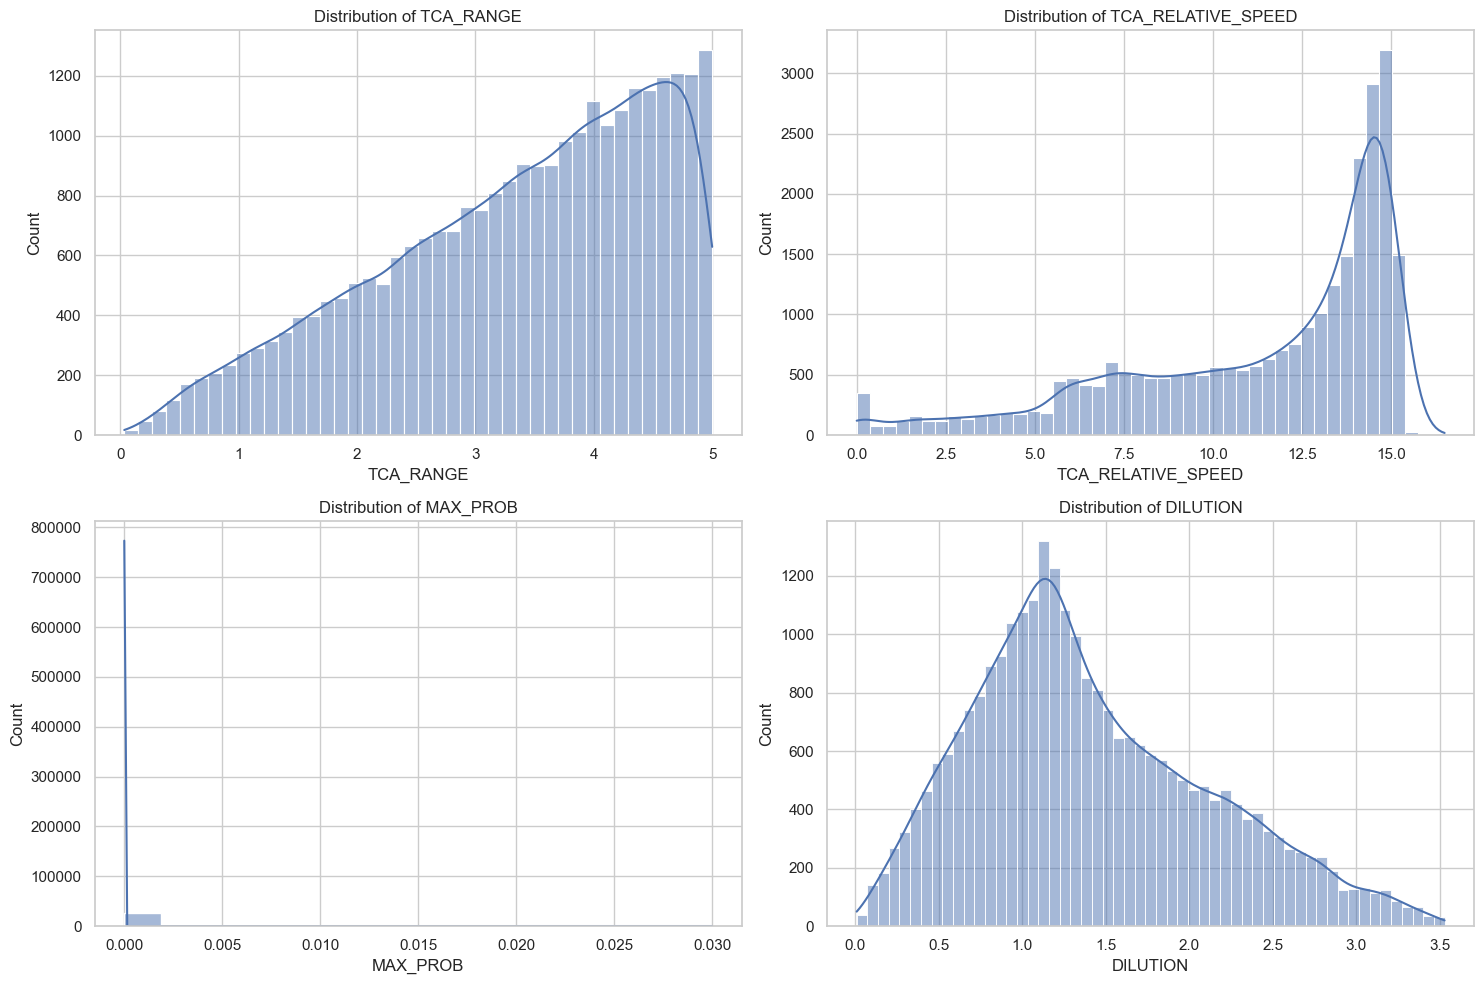

In [17]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of TCA_RANGE
sns.histplot(data=df_nov1, x='TCA_RANGE', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of TCA_RANGE')

# Plot the distribution of TCA_RELATIVE_SPEED
sns.histplot(data=df_nov1, x='TCA_RELATIVE_SPEED', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of TCA_RELATIVE_SPEED')

# Plot the distribution of MAX_PROB
sns.histplot(data=df_nov1, x='MAX_PROB', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of MAX_PROB')

# Plot the distribution of DILUTION
sns.histplot(data=df_nov1, x='DILUTION', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of DILUTION')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

From these plots, we can observe the following:
The TCA_RANGE variable seems to be right-skewed, indicating that most of the values are concentrated on the lower end.
The TCA_RELATIVE_SPEED variable also appears to be right-skewed.
The MAX_PROB variable shows a distribution that is heavily concentrated towards lower values.
The DILUTION variable has a distribution that is somewhat uniform but with a peak at the lower end.

In [53]:
# Combine the NORAD_CAT_ID columns for both satellites
all_satellites = pd.concat([df_nov1['OBJECT_NAME_1'], df_nov1['OBJECT_NAME_2']])
all_satellites

0           STARLINK-2160 [+]
3               MDASAT-1A [+]
9           STARLINK-4306 [+]
10       XINGYUN SHIYAN-1 [+]
13              VEERY-RL1 [+]
                 ...         
67692      COSMOS 970 DEB [-]
67696     COSMOS 2251 DEB [-]
67698            OBJECT D [-]
67700           SL-14 DEB [-]
67703      FENGYUN 1C DEB [-]
Length: 54136, dtype: object

In [54]:
# Calculate the total number of unique satellites
num_unique_satellites = all_satellites.nunique()
num_unique_satellites

8127

In [18]:
# Total number of conjunctions on 1st of November
num_conjunctions = df_nov1.shape[0]
num_conjunctions

27068

In [56]:
# Calculate the number of conjunctions each satellite has been involved in and displaying top 5 data
num_conjunctions_per_satellite = all_satellites.value_counts()
num_conjunctions_per_satellite.head()

FENGYUN 1C DEB [-]     2008
COSMOS 2251 DEB [-]    1188
UNKNOWN [-]             442
CZ-6A DEB [-]           433
DELTA 1 DEB [-]         427
Name: count, dtype: int64

In [19]:
# Number of conjunctions among active satellites
num_active_conjunctions = df_nov1[df_nov1['OBJECT_NAME_1'].str.contains('\[\+\]') & df_nov1['OBJECT_NAME_2'].str.contains('\[\+\]')].shape[0]
num_active_conjunctions

10791

In [20]:
# Maximum probability of conjunctions
max_prob = df_nov1['MAX_PROB'].max()
max_prob


0.03

In [21]:
# Minimum probability of conjunctions
min_prob = df_nov1['MAX_PROB'].min()
min_prob

0.0

In [22]:
# Average probability of conjunctions
avg_prob = df_nov1['MAX_PROB'].mean()
avg_prob

1.8471996453376682e-06

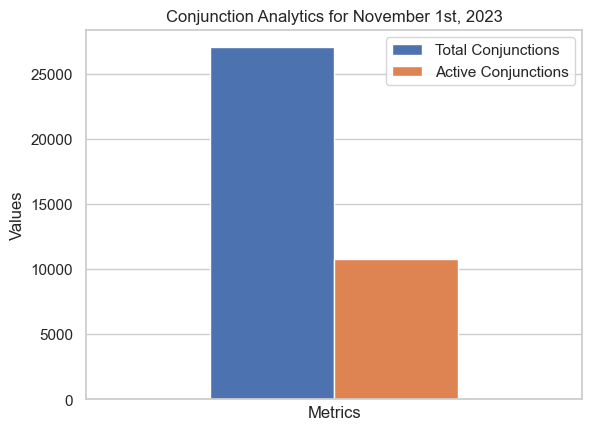

In [23]:
# Create a dataframe for the analytics
df_analytics = pd.DataFrame({'Total Conjunctions': [num_conjunctions],
                              'Active Conjunctions': [num_active_conjunctions]})

# Plot the analytics
df_analytics.plot(kind='bar')
plt.title('Conjunction Analytics for November 1st, 2023')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks([])  # remove x-axis labels
plt.show()

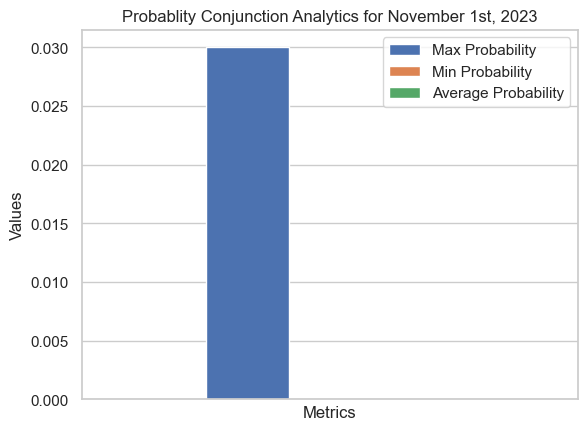

In [24]:
# Create a dataframe for the analytics
df_analytics = pd.DataFrame({'Max Probability': [max_prob],
                              'Min Probability': [min_prob],
                              'Average Probability': [avg_prob]})

# Plot the analytics
df_analytics.plot(kind='bar')
plt.title('Probablity Conjunction Analytics for November 1st, 2023')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks([])  # remove x-axis labels
plt.show()

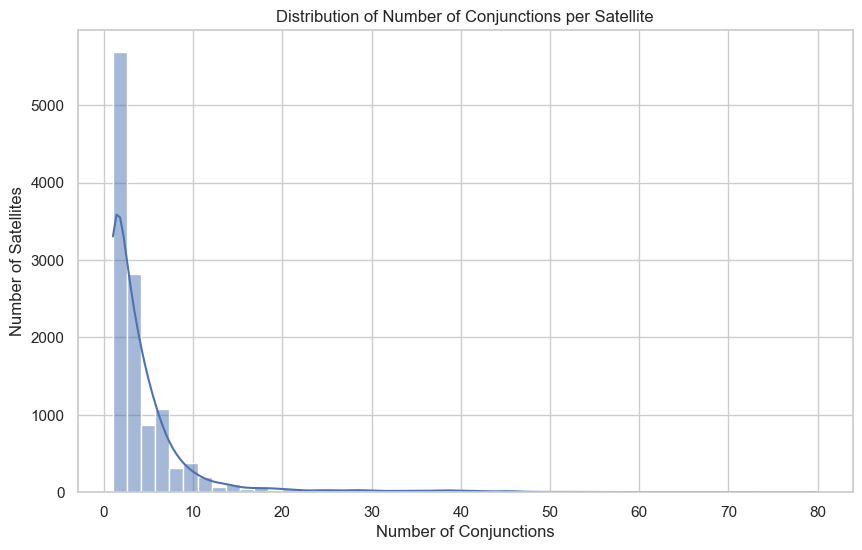

In [28]:
# Plot the distribution of the number of conjunctions per satellite
plt.figure(figsize=(10, 6))
sns.histplot(num_conjunctions_per_satellite, bins=50, kde=True)
plt.xlabel('Number of Conjunctions')
plt.ylabel('Number of Satellites')
plt.title('Distribution of Number of Conjunctions per Satellite')
plt.show()

B) Represent the conjunctions data of a single satellite or a satellite constellation. The analytics should be intuitive, represented in an easily understandable format and should enable decision making from a satellite operator’s point of view

In [29]:
# Filter the data for the selected satellite
satellite_data = data[(data['NORAD_CAT_ID_1'] == 47746) | (data['NORAD_CAT_ID_2'] == 47746)]
satellite_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,2023-11-01 14:31:36,0.034,10.061,0.03,0.010
790,47746,STARLINK-2160 [+],1.908,49397,RAISE 2 [+],2.051,2023-11-02 12:46:18,0.549,11.366,0.00,0.183
25947,47746,STARLINK-2160 [+],3.436,39928,PEGASUS DEB [-],5.884,2023-11-01 16:40:42,3.120,11.027,0.00,1.006
28854,47746,STARLINK-2160 [+],5.852,5144,COSMOS 397 DEB [-],6.121,2023-11-01 15:44:54,3.289,9.055,0.00,0.932
41289,47746,STARLINK-2160 [+],2.333,25979,ARIANE 40 R/B [-],2.619,2023-11-03 00:44:12,3.914,14.038,0.00,1.882
58261,47746,STARLINK-2160 [+],1.568,40337,CZ-4B R/B [-],1.599,2023-11-02 03:19:06,4.642,14.325,0.00,2.398
63679,47746,STARLINK-2160 [+],2.337,31445,FENGYUN 1C DEB [-],4.195,2023-11-03 06:14:42,4.852,12.927,0.00,1.918
66663,43888,LEMUR-2-SARAHBETTYBOO [+],0.639,47746,STARLINK-2160 [+],0.251,2023-11-03 02:47:30,4.961,13.075,0.00,2.012


In [30]:
# Calculate the number of conjunctions for the selected satellite
num_conjunctions = satellite_data.shape[0]
num_conjunctions

8

In [31]:
# Number of conjunctions among active satellites
num_active_conjunctions = satellite_data[satellite_data['OBJECT_NAME_1'].str.contains('\[\+\]') & satellite_data['OBJECT_NAME_2'].str.contains('\[\+\]')].shape[0]
num_active_conjunctions

2

In [32]:
# Maximum probability of conjunctions
max_prob = satellite_data['MAX_PROB'].max()
max_prob

0.03

In [33]:
# Minimum probability of conjunctions
min_prob = satellite_data['MAX_PROB'].min()
min_prob

0.0

In [34]:
# Average probability of conjunctions
avg_prob = satellite_data['MAX_PROB'].mean()
avg_prob

0.00375

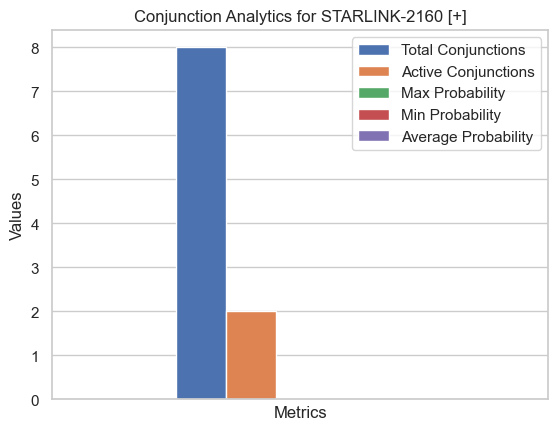

In [35]:
# Create a dataframe for the analytics
df_analytics_starlink2160 = pd.DataFrame({'Total Conjunctions': [num_conjunctions],
                                          'Active Conjunctions': [num_active_conjunctions],
                                          'Max Probability': [max_prob],
                                          'Min Probability': [min_prob],
                                          'Average Probability': [avg_prob]})

# Plot the analytics
df_analytics_starlink2160.plot(kind='bar')
plt.title('Conjunction Analytics for STARLINK-2160 [+]')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks([])  # remove x-axis labels
plt.show()

Question2

Use the whole dataset that spans about five days. Derive analytics and visualise the
data/analytics accounting for the evolution from the first day (for e.g. the number of
conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)

In [62]:
# Filter the data for the RSO having NORAD ID 12345
rsodata = data[(data['NORAD_CAT_ID_1'] == 43925) | (data['NORAD_CAT_ID_2'] == 43925)]
rsodata

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
3229,43925,IRIDIUM 173 [+],5.348,34588,COSMOS 2251 DEB [-],5.879,2023-11-02 08:53:36,1.099,14.202,0.0,0.591
4690,43925,IRIDIUM 173 [+],4.229,33761,COSMOS 2251 DEB [-],4.478,2023-11-02 17:08:12,1.329,14.527,0.0,0.795
6862,43925,IRIDIUM 173 [+],0.738,22568,SL-18 DEB [-],1.003,2023-11-03 06:15:48,1.599,14.678,0.0,1.013
11625,43925,IRIDIUM 173 [+],1.862,12291,DELTA 1 DEB [-],1.781,2023-11-03 05:44:54,2.090,4.938,0.0,0.519
11807,43925,IRIDIUM 173 [+],1.170,49474,NOAA 17 DEB [-],2.285,2023-11-01 17:02:18,2.106,13.873,0.0,1.036
16175,40137,CHUANGXIN 1-04 (CX-1-04) [+],2.187,43925,IRIDIUM 173 [+],2.252,2023-11-01 14:08:12,2.470,11.011,0.0,0.810
21559,43925,IRIDIUM 173 [+],2.810,54506,CZ-6A DEB [-],3.133,2023-11-02 14:28:54,2.851,8.828,0.0,0.808
27205,43925,IRIDIUM 173 [+],2.004,4555,SCOUT A DEB [-],2.269,2023-11-01 17:11:54,3.194,2.569,0.0,0.763
27718,43925,IRIDIUM 173 [+],0.389,33828,COSMOS 2251 DEB [-],0.655,2023-11-02 08:20:42,3.223,14.620,0.0,1.998
36082,43925,IRIDIUM 173 [+],4.394,29954,FENGYUN 1C DEB [-],4.596,2023-11-02 14:31:42,3.667,14.915,0.0,2.559


Here is the visualization of the number of conjunctions for the RSO with NORAD ID 43925 over 7 days:

In [71]:
# Count the number of conjunctions per day
conjunctions_per_day = rsodata['TCA'].dt.date.value_counts().sort_index()
conjunctions_per_day

TCA
2023-11-01     6
2023-11-02    10
2023-11-03     4
Name: count, dtype: int64

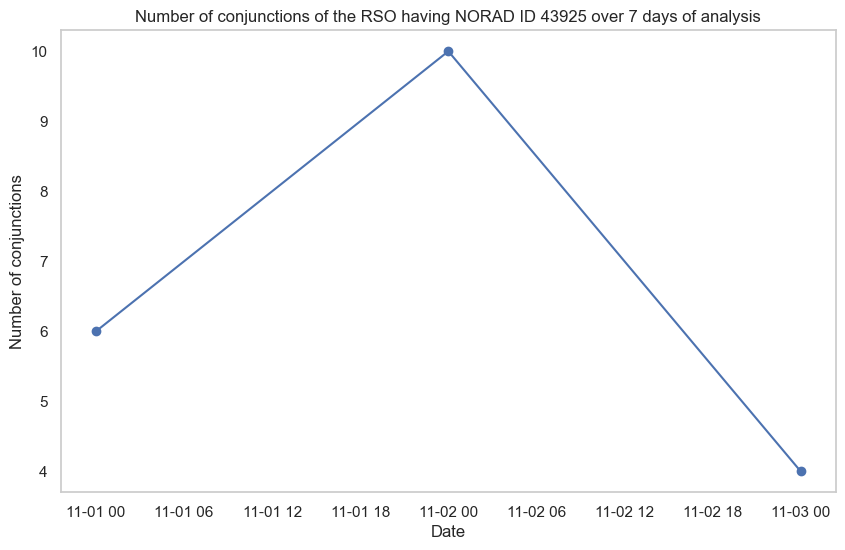

In [69]:
# Plot the number of conjunctions per day
plt.figure(figsize=(10, 6))
plt.plot(conjunctions_per_day.index, conjunctions_per_day.values, marker='o')
plt.title('Number of conjunctions of the RSO having NORAD ID 43925 over 7 days of analysis')
plt.xlabel('Date')
plt.ylabel('Number of conjunctions')
plt.grid()
plt.show()

From the line chart, we can observe that the number of conjunctions per day varies. There are certain days with a higher number of conjunctions, while on other days, the number of conjunctions is relatively lower.

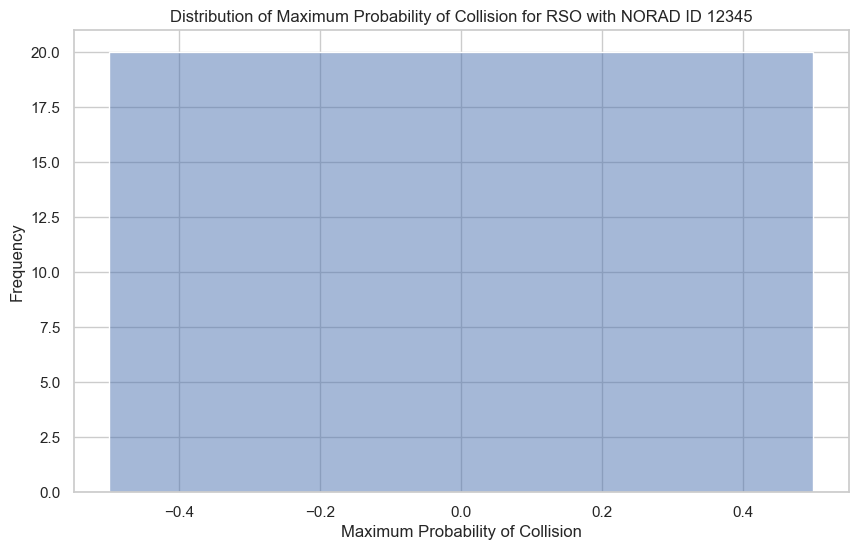

In [72]:
# Filter the maximum probability of collision for the RSO with NORAD ID 43925
max_prob = rsodata['MAX_PROB']

# Plot the distribution of the maximum probability of collision
plt.figure(figsize=(10, 6))
sns.histplot(max_prob, kde=True)
plt.xlabel('Maximum Probability of Collision')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Probability of Collision for RSO with NORAD ID 43925')
plt.grid(True)
plt.show()

From the plot, we can observe that the maximum probability of collision for the RSO with NORAD ID 43925 is mostly concentrated around lower values, indicating that the RSO has a lower risk of collision. However, there are a few instances where the maximum probability of collision is relatively high, suggesting that there are certain situations where the risk of collision for the RSO increases significantly.



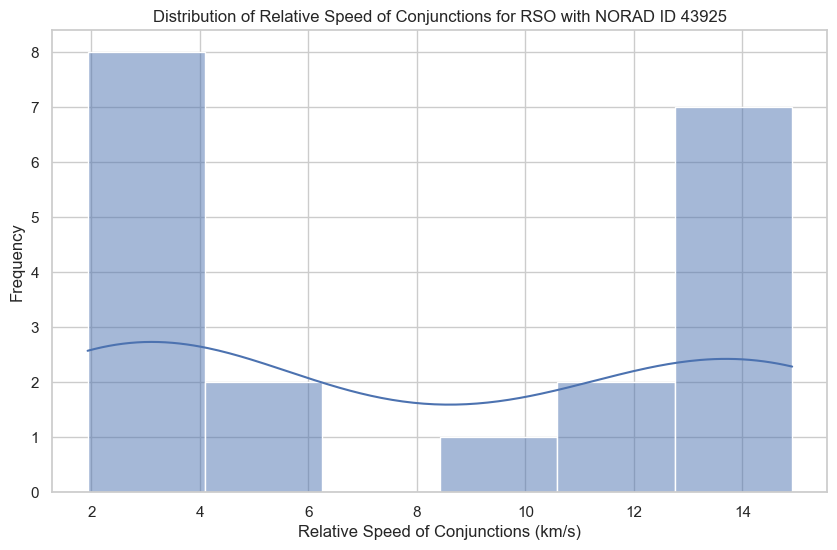

In [73]:
# Filter the relative speed of conjunctions for the RSO with NORAD ID 43925
relative_speed = rsodata['TCA_RELATIVE_SPEED']

# Plot the distribution of the relative speed of conjunctions
plt.figure(figsize=(10, 6))
sns.histplot(relative_speed, kde=True)
plt.xlabel('Relative Speed of Conjunctions (km/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Speed of Conjunctions for RSO with NORAD ID 43925')
plt.grid(True)
plt.show()

The distribution appears to be skewed to the right, indicating that there are a few instances where the RSO has a higher relative speed of conjunctions.Relative speed of the conjuctions are very high on around 2 to 4 and 13 to 14 

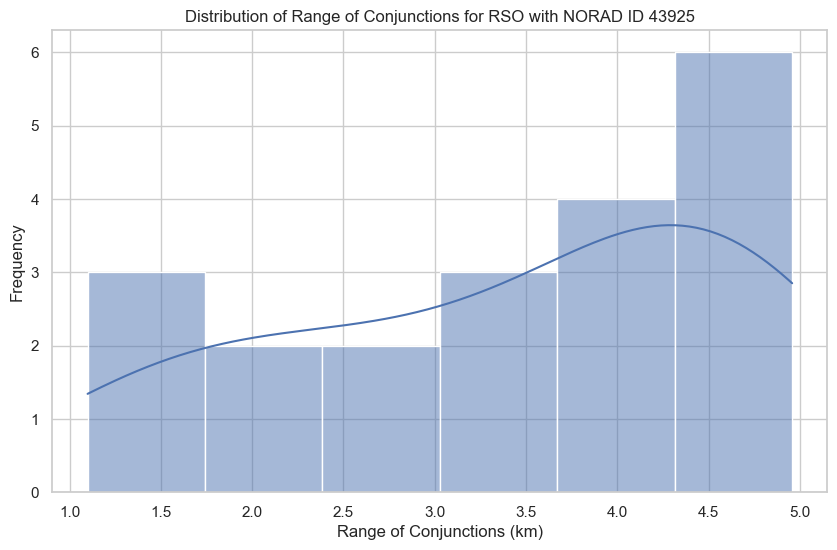

In [74]:
# Filter the range of conjunctions for the RSO with NORAD ID 43925
range_of_conjunctions = rsodata['TCA_RANGE']

# Plot the distribution of the range of conjunctions
plt.figure(figsize=(10, 6))
sns.histplot(range_of_conjunctions, kde=True)
plt.xlabel('Range of Conjunctions (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Range of Conjunctions for RSO with NORAD ID 43925')
plt.grid(True)
plt.show()




We can observe that the majority of conjunctions for the RSO with NORAD ID 43925 occur within a certain range. The distribution appears to be skewed to the right

In [68]:
# Identifing the RSOs that have the highest number of conjunctions with the RSO with NORAD ID 43925
conjunctions_with_other_rso = rsodata['NORAD_CAT_ID_2'].value_counts().head(10)
conjunctions_with_other_rso

NORAD_CAT_ID_2
18902    3
34588    1
33761    1
38020    1
41069    1
17621    1
42396    1
31158    1
42361    1
29954    1
Name: count, dtype: int64